In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


## 1. Теорема Бернулли

Если проводится $n$ независимых испытаний случайного события $A$, такого что $P(A)=p$, то относительная частота $\frac{\mu}{n}$ появления события 𝐴 ($\mu$ - число появлений $A$) при большом $n$ приближенно равна вероятности $p$:

Будем писать $\frac{\mu}{n} \rightarrow p$ при $n \rightarrow \infty$, если
$$
\displaystyle \forall \varepsilon > 0 \quad P\left\{\left|\frac{\mu}{n} - p\right| < \varepsilon \right\} \rightarrow 1 \quad \text{при} \quad n \rightarrow \infty
$$

### Бросание симметричной монеты

0 - решка, 1 - орёл

In [3]:
arr = np.random.randint(2, size=1850)
arr1 = arr[:170].copy()

cnt_heads170 = arr1.sum()
freq_heads170 = arr1.mean()
cnt_heads = arr.sum()
freq_heads = arr.mean()

print(f"В серии из 170 испытаний орёл появился {arr1.sum()} раз(а), относительная частота составляет {arr1.mean()}")
print(f"В серии из 1850 испытаний орёл появился {arr.sum()} раз(а), относительная частота составляет {arr.mean()}")

В серии из 170 испытаний орёл появился 91 раз(а), относительная частота составляет 0.5352941176470588
В серии из 1850 испытаний орёл появился 901 раз(а), относительная частота составляет 0.48702702702702705


## 2. Закон больших чисел в форме Чебышёва

Говорят, что $\{\xi_i\}_{i=1}^n$ - последовательность случайных величин подчиняется закону больших чисел, если
$$
\displaystyle \forall \varepsilon > 0 \quad P\left\{\left|\frac{1}{n}\sum_{i=1}^n \xi_i - \frac{1}{n}\sum_{i=1}^n M \xi_i \right| < \varepsilon \right\} \rightarrow 1 \quad \text{при} \quad n \rightarrow \infty
$$

### Испытание практически достоверного события.

Проверим выполнение соотношения для экспоненциально распределённых слагаемых с $M\xi = 1$. Принять $\varepsilon_1 = 0.2, \varepsilon_2 = 0.05$. При произвольном $\varepsilon$ и выборе $n$ из условия $n \geq \frac{9D\xi}{n^2}$ (2) выполняется с $p = 0.997$. Если же $n \geq \frac{5.4D\xi}{n^2}$, то $p = 0.98$. Второе нас устраивает в качестве достоверного события.

$M\xi = 1 = D\xi$

$\varepsilon_1 = 0.2 \implies n_1 = 135$

$\varepsilon_2 = 0.05 \implies n_2 = 2160$

In [4]:
arr = np.random.exponential(scale=1.0, size=2160)
arr135 = arr[:135].copy()

m, m135 = arr.mean(), arr135.mean()

print(f"Среднее за 135 испытаний: {m135}\nРазница с 1: {abs(1.0 - m135)}\n")
print(f"Среднее за 2160 испытаний: {m}\nРазница с 1: {abs(1.0 - m)}")

Среднее за 135 испытаний: 1.0531808020568048
Разница с 1: 0.053180802056804755

Среднее за 2160 испытаний: 1.0174187566819473
Разница с 1: 0.017418756681947256


### Невыполнение закона больших чисел

Рассмотрим случайную величину, распределённую по закону Коши с плотностью
$$
\displaystyle p(x) = \frac{1}{\pi}\frac{1}{1+x^2}
$$
У данного распределения нет ни математического ожидания, ни дисперсии $\implies$ не выполняется закон больших чисел. Создадим 7 выборок с данным распределением.

In [5]:
arr_cauchy = np.array([np.random.standard_cauchy(size=1000) for _ in range(7)])
mean_cauchy = np.array([arr.mean() for arr in arr_cauchy])
for i, mean in enumerate(mean_cauchy):
    print(f"Среднее значение для выборки {i+1}: {mean}")

Среднее значение для выборки 1: -0.7190780406839327
Среднее значение для выборки 2: 0.21343792009840284
Среднее значение для выборки 3: -8.3114757457651
Среднее значение для выборки 4: -1.6513060055630506
Среднее значение для выборки 5: -0.5280964151990771
Среднее значение для выборки 6: 1.325397831325428
Среднее значение для выборки 7: -2.4963159621387248


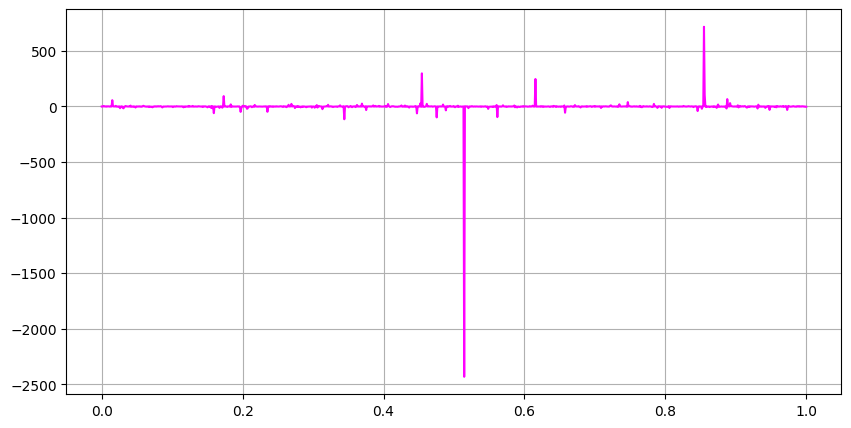

In [6]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.plot(np.linspace(0, 1, 1000), arr_cauchy[3], color='fuchsia')
plt.grid()
plt.show()

Как видим, есть выбросы, которые далеко отстают от центра рассеивания в точке 0

### Сжатие распределения с ростом числа слагаемых

ЗБЧ в форме Чебышёва означает, что распределение случайной величины $ \theta = \frac{1}{n}\sum_{i=1}^n \xi_i$ сжимается с ростом $n$. Если $M\xi_i = a$, то сжатие происходит в окрестности точки $a$. Для демонстрации используем нормальное распределение со следующими параметрами: $\mu = 1 = \sigma^2$

Если $\xi_i \sim \mathcal{N}(\mu, \sigma^2)$, то $\theta \sim \mathcal{N}(\mu, \frac{\sigma^2}{n})$

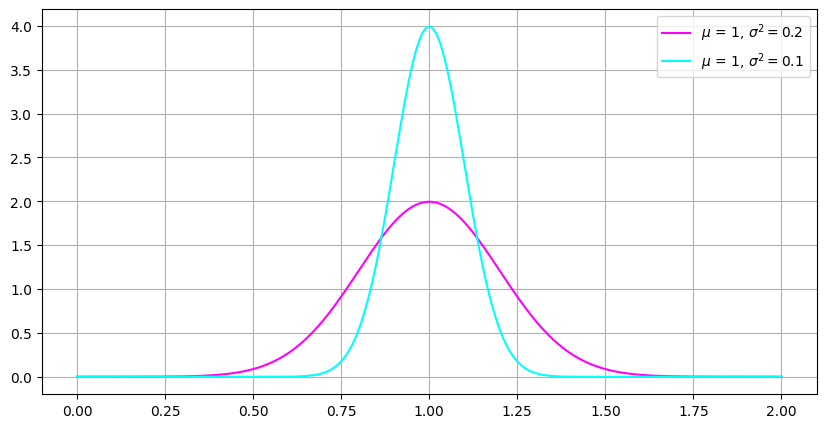

In [7]:
mu = sigma = 1

def normal(x, mu, sigma):
    return (1/(sigma * np.sqrt(2*np.pi))) * np.exp(-(x-mu)**2/(2*sigma**2))

x = np.linspace(0, 2, 1000)

fig, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.plot(x, normal(x, mu, sigma/5), color="fuchsia", label=f"$\\mu$ = {mu}, $\\sigma^2 = ${sigma**2/5}")
axs.plot(x, normal(x, mu, sigma/10), color="cyan", label=f"$\\mu$ = {mu}, $\\sigma^2 = ${sigma**2/10}")
axs.legend()
axs.grid()
plt.show()

## 3. Теорема Гливенко - основная теорема статистики.

$\{\xi_i\}_{i=1}^n$ - выборка из $n$ независимых наблюдений над случайной величиной $\xi$ с функцией распределения $F(x)$. Получим вариационный ряд $\xi_1 \leq \xi_2 \leq ... \leq \xi_n$.
Определим функцию эмпирического распределения
$$
\displaystyle F^*_n(x) = \frac{\mu_n(x)}{n}, 
$$
где $\mu_n(x)$ - число тех наблюдений, для которых $\xi_i < x$.

### Теорема Гливенко
$$
\sup |F^*_n(x) - F(x)| \rightarrow 0 \quad \text{при} \quad n \rightarrow \infty \quad \text{с вероятностью 1}
$$

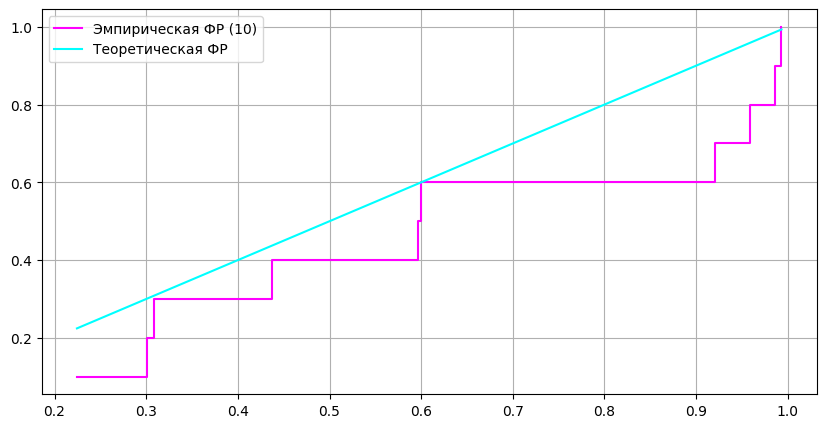

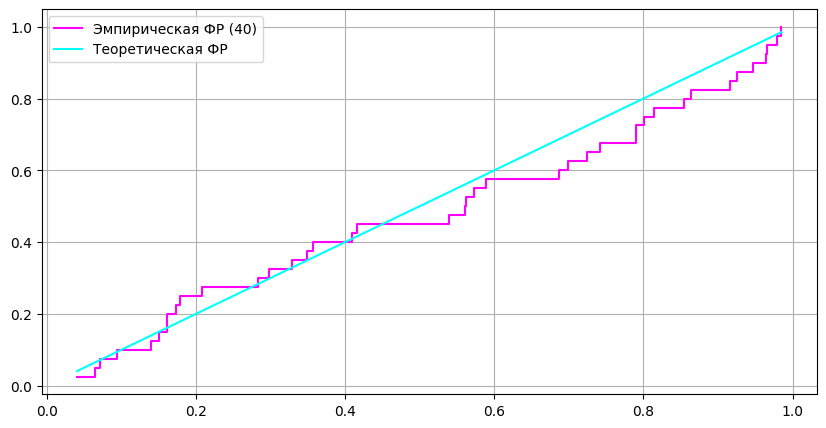

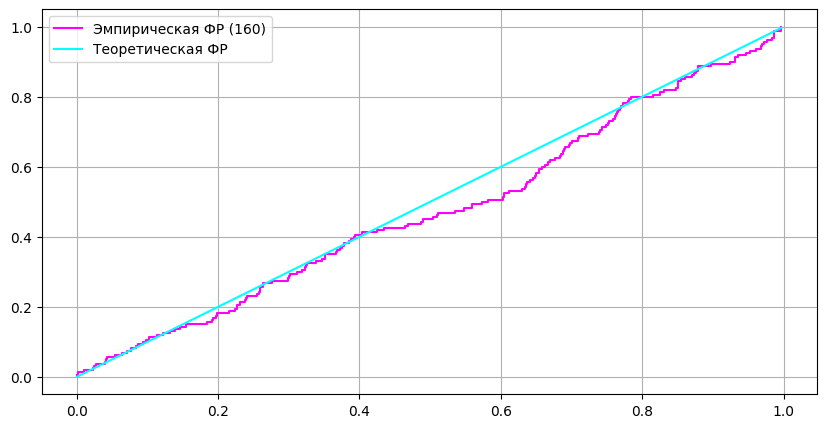

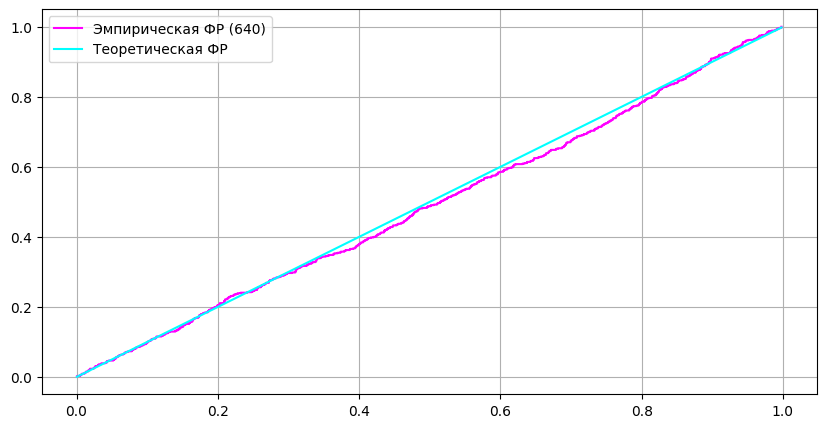

In [8]:
def emp_distr(sample_size):
    sample = np.sort(np.random.uniform(0, 1, sample_size))
    emp = np.arange(1, sample_size + 1)/sample_size
    fig, axs = plt.subplots(1, 1, figsize=(10, 5))
    axs.step(sample, emp, label=f'Эмпирическая ФР ({sample_size})', where='post', color="fuchsia")
    axs.plot(sample, stats.uniform.cdf(sample), label='Теоретическая ФР', color="cyan")
    plt.legend()
    plt.grid()
    plt.show()
    
sizes = [10, 40, 160, 640]
for size in sizes:
    emp_distr(size)


## 4. Центральная предельная теорема

Рассмотрим сумму случайных величин $\sum_{i=1}^n \xi_i$. Оказывается, что при широких условиях по мере увеличения числа слагаемых эта сумма приблизительно распределена по нормальному закону. Если говорить более точно, то
$$
\displaystyle P\left\{\frac{\sum_{i=1}^n \xi_i - M\sum_{i=1}^n \xi_i}{\sqrt{D \sum_{i=1}^n \xi_i}} < x\right\} \rightarrow \Phi(x) = \int_{-\infty}^x \frac{e^{-\frac{t^2}{2}}}{\sqrt{2\pi}} \mathrm{d}t
$$

### Одинаково распределенные слагаемые.

Убедимся статистически в том, что сумма нескольких случайных величин распределена
приближенно по нормальному закону. Сделаем это на примере суммы $\sum_{i=1}^n \xi_i, \quad n=6$
независимых случайных величин, имеющих $\mathcal{B}(a, b)$ - бета-распределение.

Чтобы статистически оценить закон распределения для суммы, следует многократно промоделировать суммирование: получим выборки для сумм. Для неё построим гистограмму и сравним ее с нормальной плотностью. Создадим 6 выборок, имеющих $\mathcal{B}(a, b)$ с параметрами $a=b=0.5$.

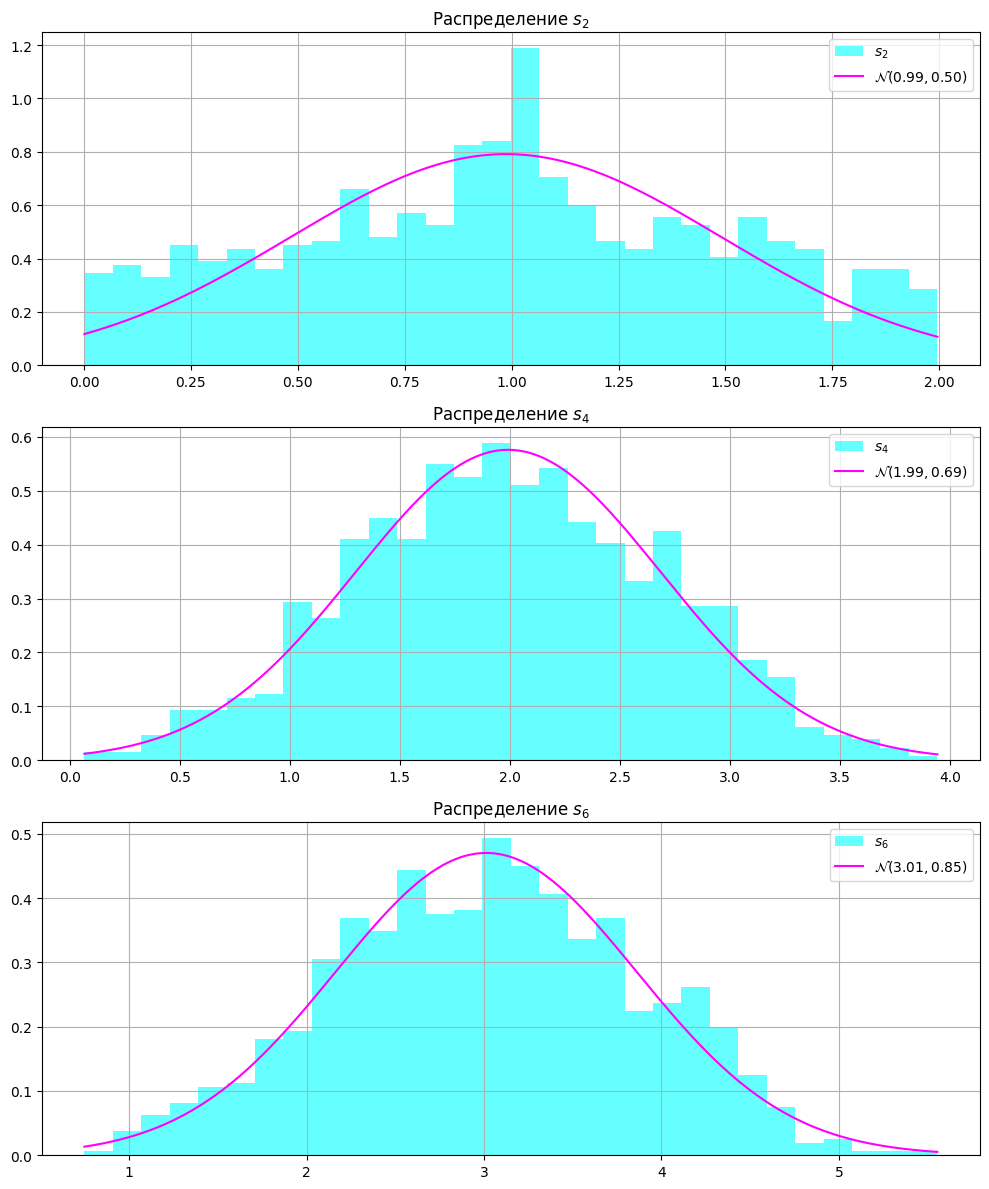

In [26]:
np.random.seed(42)
arr_beta = np.array([np.random.beta(0.5, 0.5, size=1000) for _ in range(6)])

s2 = arr_beta[0] + arr_beta[1]
s4 = s2 + arr_beta[2] + arr_beta[3]
s6 = s4 + arr_beta[4] + arr_beta[5]

s_arr = [s2, s4, s6]
s_name = ["$s_2$", "$s_4$", "$s_6$"]

plt.figure(figsize=(10, 12))

for i in range(3):
    plt.subplot(3, 1, i + 1)
    
    plt.hist(s_arr[i], bins=30, density=True, alpha=0.6, color='cyan', label=s_name[i])

    mu, sigma = np.mean(s_arr[i]), np.std(s_arr[i])
    x = np.linspace(min(s_arr[i]), max(s_arr[i]), 1000)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), color='fuchsia', label=f'$\\mathcal{{N}}({mu:.2f},{sigma:.2f})$')
    
    plt.legend()
    plt.title(f"Распределение {s_name[i]}")
    plt.grid()

plt.tight_layout()
plt.show()


Гистограммы по мере увеличения суммы стремятся к функции плотности вероятности нормального распределения